# Visualizing and Analysing Data

One of the best open-source visualization (plotting) packages is called MatPlotLib. It is capable of doing so much more than what I use it for - simple plotting, and it comes included in Anaconda, so hopefully you are able to simply pull up this notebook and be able to run the cells without having to worry about installing dependencies and such.

We can call this plotting library in Python (and Julia, but we won't look at that here) with the `import` command:

In [1]:
import matplotlib.pyplot as pt

It is useful to go to their website at this point if you are interested in seeing everything that `matplotlib` is capable of, as it is very robust. But I will focus on `pyplot`, a module for `matplotlib` that gives us all the plotting capabilites we're interested in. You may find other modules of `matplotlib` such as `plotly`, and those are very good for their uses and you should feel encouraged to explore what those other modules can accomplish. But `pyplot` is all we'll need here. It is also worth noting that `matplotlib` has their own tutorials, which will be a lot more thorough than what I'll provide here, so check those out! The goal of this notebook is simply to give you some experience with data examples that I may actually have in my research. But you could learn it all from tutorial pages elsewhere.

So now, suppose we have data to plot: `x` and `y`

In [2]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,4,9,16,25,36,49,64,81,100]

Now we call `matplotlib.pyplot` with the `pt` key

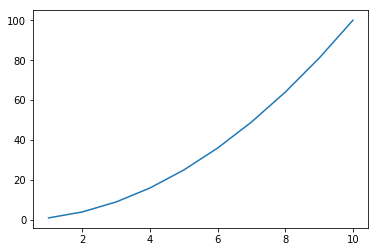

In [3]:
pt.plot(x,y)

Now this is a very pretty plot, but what information does it give us exactly? Well from looking at the data, you probably gathered that $y=x^2$. But that might not be necessarily obvious to anyone else, so lets put some labels on this plot.

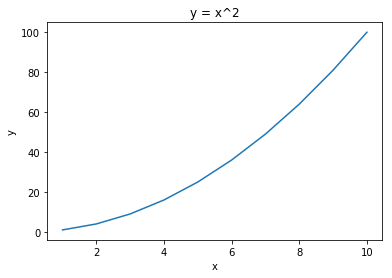

In [7]:
pt.plot(x,y)
pt.xlabel("x")
pt.ylabel("y")
pt.title("y = x^2")

Now this tells us something, but something that you should be learning in lab (the class), is that you always want units with your data. In this particular case, I gave you two vectors with numbers with no context as to what they are, so we can't really put units here. So let's suppose that the units of x are in meters (for no particular reason)

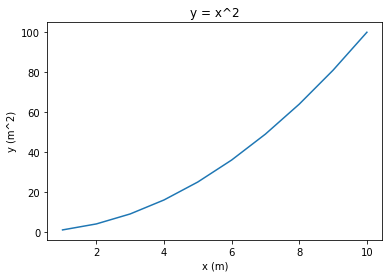

In [8]:
pt.plot(x,y)
pt.xlabel("x (m)")
pt.ylabel("y (m^2)")
pt.title("y = x^2")

Great, now we have a plot that has all the information we need from a plot. But lets try to make it prettier, more presentation quality. For this, we'll use $\LaTeX$ (LaTeX), which is a completely different monster to learn. For our purposes, we will only focus on equations via latex. To do this, you use the syntax `r"$equation content$"`. So the above plot should look like below

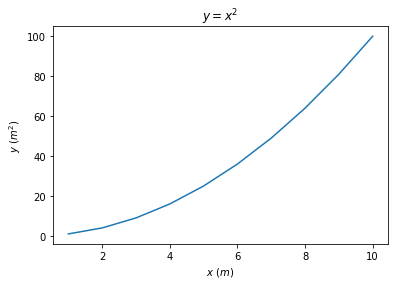

In [10]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$")
pt.ylabel(r"$y\ (m^2)$")
pt.title(r"$y = x^2$")
# The "\" after "x" and "y" means space. The syntax $content$ will
# ingore all spaces, so you preceed them with "\" if you want them

Now this looks a lot more like publication quality. It's a very small detail, but good plots all are about details. I will even change the font to something that (in my opinion) looks better. This is now a personal preference, and you can forego this step. But for the publications we submit to, this makes the labels more consistent with the rest of the text.

In [23]:
pt.rc('text', usetex=True)

Now plot again, with customized fontsizes

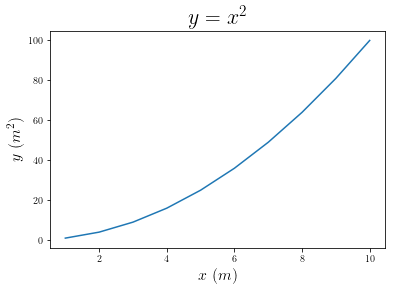

In [6]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$", fontsize=16)
pt.ylabel(r"$y\ (m^2)$", fontsize=16)
pt.title(r"$y = x^2$", fontsize=22)
# The "\" after "x" and "y" means space. The syntax $content$ will
# ingore all spaces, so you preceed them with "\" if you want them

Now let's save this plot

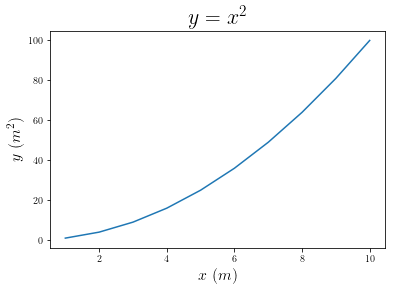

In [8]:
pt.plot(x,y)
pt.xlabel(r"$x\ (m)$", fontsize=16)
pt.ylabel(r"$y\ (m^2)$", fontsize=16)
pt.title(r"$y = x^2$", fontsize=22)
pt.savefig("samplePlot.png", dpi=300)

dpi specifies the pixel density of the image. 300 is much higher than you'd usually need, but it's not too heavy so I like playing it safe and not risking having low resolution images for presentations or papers. You might be thinking a nice alternative is to save the image as a .svg file, and indeed this is the best option for inserting images with most programs. However, it turns out that, for some reason, $\LaTeX$ does not support inserting .svg images, which is what most people in physics use for writing papers. And so we are stuck using .png or .jpg images ¯\\_(ツ)_/¯

### IN ANY CASE

Let us now look at dealing with multiple data sets! For easier vector manipulation, I'll be suing `numpy`, the go-to numerical package in python.

In [18]:
import numpy as np

In [19]:
y1 = np.array(y)
y2 = 2*np.array(y)

`y1` and `y2` are now a numpy array data structure, which is very similar to the ones we had defined above, except now we can perform operations on them as mathematical vectors! For example the line `y2 = 2*np.array(y)` is scalar-vector multiplication, where as had I done `y2 = 2*y`, it would have returned two copies of the array `y` rolled into one.

Let us plot these onto the same plot!

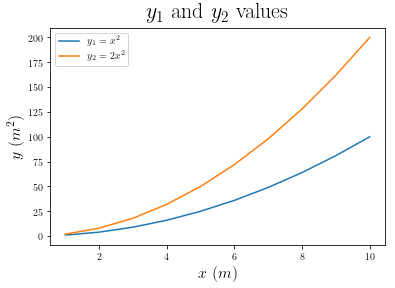

In [28]:
pt.plot(x, y1, label=r"$y_1 = x^2$")
pt.plot(x, y2, label=r"$y_2 = 2x^2$")
pt.legend()
pt.xlabel(r"$x\ (m)$", fontsize=16)
pt.ylabel(r"$y\ (m^2)$", fontsize=16)
pt.title(r"$y_1\ \textrm{and}\ y_2\ \textrm{values}$", fontsize=22)

Becuase now we had sets of data with different information, we had to include a legend with appropriate labels, and a more fitting title. However, oftentimes it is convenient to have multiple plots in one figure. This allows us to create figures that are much easier to configures for papers! But now, we'll use somethine a little different than `plot`

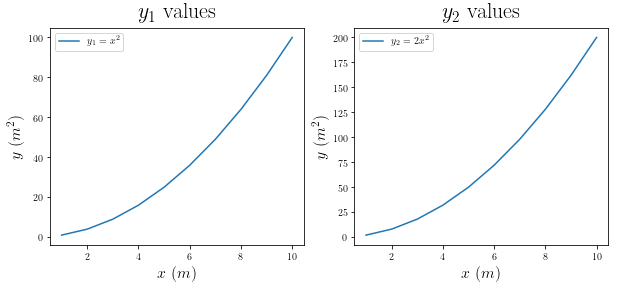

In [35]:
fig, ax = pt.subplots(1,2,sharex=True,sharey=False,figsize=(10,4))
ax[0].plot(x,y1,label=r"$y_1 = x^2$")
ax[0].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[0].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[0].set_title(r"$y_1\ \textrm{values}$",fontsize=22)
ax[0].legend()
ax[1].plot(x,y2,label=r"$y_2 = 2x^2")
ax[1].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[1].set_title(r"$y_2\ \textrm{values}$",fontsize=22)
ax[1].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[1].legend()

Using `subplots` vs `plot` has very similar syntax, but notice some slight differences with the way some labels are set. 

The line `fig, ax = pt.subplots(1,2,sharex=True,sharey=False,figsize=(10,4))` has a lot going on. The first 2 arguments specify the "rows, columns" of plots in the figure, in this case 1 by 2. But you can have a grid of as many subplots you want! The actual size being specified by `figsize=(10,4}`. The booleans `sharex, sharey` should be pretty ovious. Watch what happens when we run the same cell setting `sharey=True` 

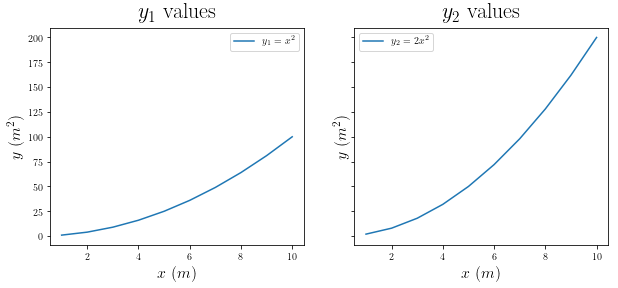

In [36]:
fig, ax = pt.subplots(1,2,sharex=True,sharey=True,figsize=(10,4))
ax[0].plot(x,y1,label=r"$y_1 = x^2$")
ax[0].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[0].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[0].set_title(r"$y_1\ \textrm{values}$",fontsize=22)
ax[0].legend()
ax[1].plot(x,y2,label=r"$y_2 = 2x^2")
ax[1].set_ylabel(r"$y\ (m^2)$", fontsize=16)
ax[1].set_title(r"$y_2\ \textrm{values}$",fontsize=22)
ax[1].set_xlabel(r"$x\ (m)$", fontsize=16)
ax[1].legend()

One more important thing to note, the variable `ax` is used to address which subplot to manipulate, as you've probably figured out. Since we have a 1 dimensional grid of 2 subplots, these are simply addressed as `[0], [1]`. If however, you did a figure of 2 by 2 subplots, those would need to be addressed as 2 dimensional array as `[row][column]: [0][0], [0][1], [1][0], [1][1]`.